# Final Project MA336 2211376

# Introduction

![Bali.jpg](Bali.jpg)

This report focuses on analyzing historical weather data obtained from the dataset available at https://www.kaggle.com/datasets/cornflake15/denpasarbalihistoricalweatherdata?resource=download From 1990 - 2020. The dataset provides comprehensive information about weather conditions in Bali, Indonesia. It includes various parameters such as Preassure, humidity, and more. The primary objective of this project is to determine the prevailing weather conditions during specific time periods. 

Accurate weather information is crucial for a variety of purposes, including agriculture, tourism, and general planning. By analyzing historical weather data, we can gain insights into patterns, trends, and fluctuations in weather conditions over time. This analysis enables us to make informed decisions based on past weather patterns and anticipate future weather conditions.

Bali, a popular tourist destination renowned for its picturesque landscapes and cultural attractions, experiences a tropical climate characterized by distinct wet and dry seasons. Understanding the weather dynamics in Bali is essential for visitors, locals, and businesses alike. This project aims to utilize the provided dataset to gain a deeper understanding of the weather patterns and conditions specific to the Denpasar area in Bali.

The dataset offers a wealth of information collected over a significant period, allowing us to explore various aspects of weather conditions. By focusing on factors such as rainfall, humidity, and other relevant parameters, we can gain insights into the climate of Denpasar and its surrounding areas. The analysis will provide valuable information for planning outdoor activities, assessing agricultural practices, and understanding the overall weather patterns in the region.

This project aimed to predict weather conditions based on the environmental conditions that occur in a given area. By analyzing various environmental factors such as temperature, humidity, wind speed, and Preassure, the objective was to develop a predictive model that could accurately forecast the prevailing weather conditions. The project aimed to leverage the relationship between these environmental variables and historical weather data to make informed predictions about future weather patterns. By understanding and predicting weather conditions, this project aimed to provide valuable insights for planning and decision-making in various fields, including agriculture, tourism, transportation, and disaster management.

# Model Used

## Random Forest Classifier

![RF.jpg.png](RF.jpg)

Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees to make predictions. It is a popular and powerful machine learning technique used for classification tasks. The key idea behind the Random Forest algorithm is to create a "forest" of decision trees and then make predictions based on the majority vote or average prediction of the individual trees.

Random Forest Classifier has wide applicability and performs well on various types of datasets. It is suitable for both binary and multiclass classification problems. Its ability to handle high-dimensional data, deal with missing values, and provide feature importance make it a versatile and reliable algorithm for classification tasks.

In summary, Random Forest Classifier combines the strengths of decision trees, randomness, and ensemble learning to create a robust and accurate classification model. It is widely used in various domains, such as finance, healthcare, and image recognition, where accurate predictions and interpretability are essential.

## Naive Bayes

![Naive.png](Naive.png)

Naive Bayes is a classification algorithm based on Bayes' theorem, which assumes that the features in a dataset are independent of each other. It is called "naive" because it makes a strong assumption of independence among the features, even though this may not be true in reality.The algorithm calculates the probability of each class label given the input features and selects the class with the highest probability as the predicted class. It utilizes Bayes' theorem to compute these probabilities, which involves estimating the prior probability of each class and the likelihood of observing the features given each class.

Naive Bayes is particularly useful when dealing with high-dimensional datasets and is known for its simplicity and efficiency. It is commonly used in text classification tasks, such as spam filtering and sentiment analysis, but can also be applied to other types of data.

Despite its simplicity, Naive Bayes has shown competitive performance in many real-world applications. However, its assumption of feature independence can limit its effectiveness in cases where the features are strongly correlated.

Overall, Naive Bayes is a probabilistic classifier that provides a fast and straightforward solution for classification problems, making it a popular choice in various domains.

# Library Import

Here, we will import some important libraries such as pandas, numpy, matplotlib, etc.

In [77]:
import pandas as pd #For data manipulation
from datetime import datetime #for dealing with datetime data
from IPython import display #For Displaying Image
import numpy as np #For mathematical equations
import matplotlib.pyplot as plt #For Plotting Graph
import plotly #For Plotting Graph
import seaborn as sns #For Plotting Graph
from collections import Counter #to counting the data
from sklearn.preprocessing import StandardScaler #For data scaling
from sklearn.model_selection import train_test_split # to perform testing split
from imblearn.over_sampling import SMOTE #for performing rebalancing data
from sklearn.ensemble import RandomForestClassifier #for making Random Forest model
from sklearn.model_selection import RandomizedSearchCV #For model Improvement
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score # For model evaluation
from sklearn.pipeline import Pipeline #to make the pipeline
from sklearn.decomposition import PCA # to make PCA
from sklearn.naive_bayes import GaussianNB #For making model naive bayes

# Data Loading & Understanding

Here we would like to load our data using pandas library

In [2]:
#For Loading Data
data = pd.read_csv(r'C:\Users\aryab\Documents\S2\Artificial Intelligence\Koding\openweatherdata-denpasar-1990-2020v0.1.csv')

After that we will take a look of our datasets

In [3]:
#Showing the data
data.head(10)

,dt_iso,timezone,city_name,lat,lon,temp,temp_min,temp_max,pressure,humidity,...,snow_3h,snow_6h,snow_12h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1/1/1990 0:00,28800,Denpasar,-8.652497,115.219117,25.82,25.82,25.82,1010.0,86,...,NaN,NaN,NaN,NaN,NaN,98,500,Rain,light rain,10d
1,1/1/1990 1:00,28800,Denpasar,-8.652497,115.219117,26.20,26.20,26.20,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,91,500,Rain,light rain,10d
2,1/1/1990 2:00,28800,Denpasar,-8.652497,115.219117,26.45,26.45,26.45,1011.0,84,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
3,1/1/1990 3:00,28800,Denpasar,-8.652497,115.219117,26.80,26.80,26.80,1011.0,82,...,NaN,NaN,NaN,NaN,NaN,94,500,Rain,light rain,10d
4,1/1/1990 4:00,28800,Denpasar,-8.652497,115.219117,27.04,27.04,27.04,1010.0,82,...,NaN,NaN,NaN,NaN,NaN,76,803,Clouds,broken clouds,04d
5,1/1/1990 5:00,28800,Denpasar,-8.652497,115.219117,27.23,27.23,27.23,1009.0,82,...,NaN,NaN,NaN,NaN,NaN,65,803,Clouds,broken clouds,04d
6,1/1/1990 6:00,28800,Denpasar,-8.652497,115.219117,27.32,27.32,27.32,1008.0,82,...,NaN,NaN,NaN,NaN,NaN,68,803,Clouds,broken clouds,04d
7,1/1/1990 7:00,28800,Denpasar,-8.652497,115.219117,27.29,27.29,27.29,1008.0,82,...,NaN,NaN,NaN,NaN,NaN,71,500,Rain,light rain,10d
8,1/1/1990 8:00,28800,Denpasar,-8.652497,115.219117,27.34,27.34,27.34,1007.0,81,...,NaN,NaN,NaN,NaN,NaN,76,500,Rain,light rain,10d
9,1/1/1990 9:00,28800,Denpasar,-8.652497,115.219117,27.23,27.23,27.23,1007.0,82,...,NaN,NaN,NaN,NaN,NaN,87,804,Clouds,overcast clouds,04d


Due to Indonesia's tropical climate, it experiences two distinct seasons, namely the rainy season and the hot season. As a result, it is logical that there are no instances of snow recorded in the dataset, as snowfall does not occur in this region.

Next we would like to inspect about the statistical measurement in our dataset

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timezone,264924.0,28800.000000,0.000000e+00,28800.000000,28800.000000,28800.000000,28800.000000,28800.000000
lat,264924.0,-8.652497,1.776360e-15,-8.652497,-8.652497,-8.652497,-8.652497,-8.652497
lon,264924.0,115.219117,8.526529e-14,115.219117,115.219117,115.219117,115.219117,115.219117
temp,264924.0,27.273336,1.962571e+00,3.000000,25.940000,27.000000,28.600000,39.000000
temp_min,264924.0,27.147962,1.973218e+00,2.000000,25.820000,27.000000,28.400000,39.000000
temp_max,264924.0,27.397479,1.989172e+00,3.000000,26.000000,27.000000,29.000000,39.800000
pressure,264924.0,1010.032919,2.286581e+00,998.400000,1008.400000,1010.200000,1011.900000,1023.200000
humidity,264924.0,80.844997,8.720109e+00,14.000000,74.000000,83.000000,88.000000,100.000000
wind_speed,264924.0,3.612394,1.909580e+00,0.010000,2.100000,3.600000,4.710000,31.900000
wind_deg,264924.0,158.204696,8.500005e+01,0.000000,106.000000,120.000000,250.000000,360.000000


Upon conducting statistical measurements, it was observed that certain outliers were detected in the dataset. In order to ensure data integrity and reliability, a thorough investigation of these outliers will be carried out during the data cleansing phase.

# Data Cleansing

Initially, we focused on selecting specific columns from the dataset for analysis, namely temperature, pressure, humidity, and wind speed. Additionally, our target variable of interest was the main weather condition. By narrowing down our variables to these key factors, we aimed to streamline our analysis and prioritize the essential elements for predicting and understanding the prevailing weather patterns.

In [5]:
#Selecting Data
data_selected = data[['dt_iso','temp', 'temp_min', 'temp_max','pressure','humidity','wind_speed','weather_main']]
data_selected.head(5)

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,weather_main
0,1/1/1990 0:00,25.82,25.82,25.82,1010.0,86,1.36,Rain
1,1/1/1990 1:00,26.20,26.20,26.20,1011.0,84,2.09,Rain
2,1/1/1990 2:00,26.45,26.45,26.45,1011.0,84,2.44,Rain
3,1/1/1990 3:00,26.80,26.80,26.80,1011.0,82,2.29,Rain
4,1/1/1990 4:00,27.04,27.04,27.04,1010.0,82,1.71,Clouds


Next, we will check is there any null values in our dataset

In [6]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dt_iso        264924 non-null  object 
 1   temp          264924 non-null  float64
 2   temp_min      264924 non-null  float64
 3   temp_max      264924 non-null  float64
 4   pressure      264924 non-null  float64
 5   humidity      264924 non-null  int64  
 6   wind_speed    264924 non-null  float64
 7   weather_main  264924 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.2+ MB


As we have date objects, we will attempt to convert them from the object type to the date type.

In [7]:
#Change into specific format
data_selected['dt_iso'] = data_selected['dt_iso'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").date())

C:\Users\aryab\AppData\Local\Temp\ipykernel_628\346312764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['dt_iso'] = data_selected['dt_iso'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").date())


In [8]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264924 entries, 0 to 264923
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   dt_iso        264924 non-null  object 
 1   temp          264924 non-null  float64
 2   temp_min      264924 non-null  float64
 3   temp_max      264924 non-null  float64
 4   pressure      264924 non-null  float64
 5   humidity      264924 non-null  int64  
 6   wind_speed    264924 non-null  float64
 7   weather_main  264924 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 16.2+ MB


In [9]:
data_selected.head(5)

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,weather_main
0,1990-01-01,25.82,25.82,25.82,1010.0,86,1.36,Rain
1,1990-01-01,26.20,26.20,26.20,1011.0,84,2.09,Rain
2,1990-01-01,26.45,26.45,26.45,1011.0,84,2.44,Rain
3,1990-01-01,26.80,26.80,26.80,1011.0,82,2.29,Rain
4,1990-01-01,27.04,27.04,27.04,1010.0,82,1.71,Clouds


Our dataset does not contain any null values. Therefore, we can proceed with the next steps to address the presence of outliers in the data

{'whiskers': [<matplotlib.lines.Line2D at 0x20442156500>,
 'caps': [<matplotlib.lines.Line2D at 0x20442156aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20442154f40>,
 'medians': [<matplotlib.lines.Line2D at 0x20442157040>,
 'fliers': [<matplotlib.lines.Line2D at 0x20442157310>,
 'means': []}

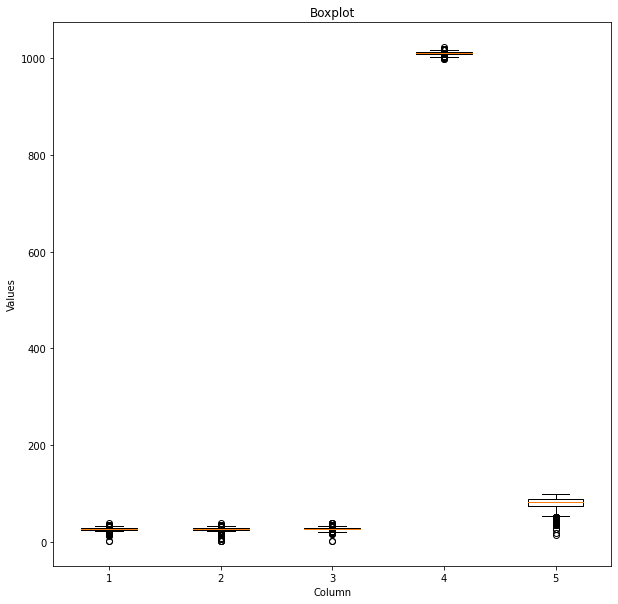

In [10]:
#Plotting the boxplot
plt.figure(figsize=(10,10))
plt.xlabel('Column')
plt.ylabel('Values')
plt.title("Boxplot")
plt.boxplot(data_selected.iloc[:,1:6])

We will devide, because there are different scale, to give our understanding of the visualization

{'whiskers': [<matplotlib.lines.Line2D at 0x2041cfeee00>,
 'caps': [<matplotlib.lines.Line2D at 0x204422cc0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20447ba4d90>,
 'medians': [<matplotlib.lines.Line2D at 0x204422cc640>,
 'fliers': [<matplotlib.lines.Line2D at 0x204422cc910>,
 'means': []}

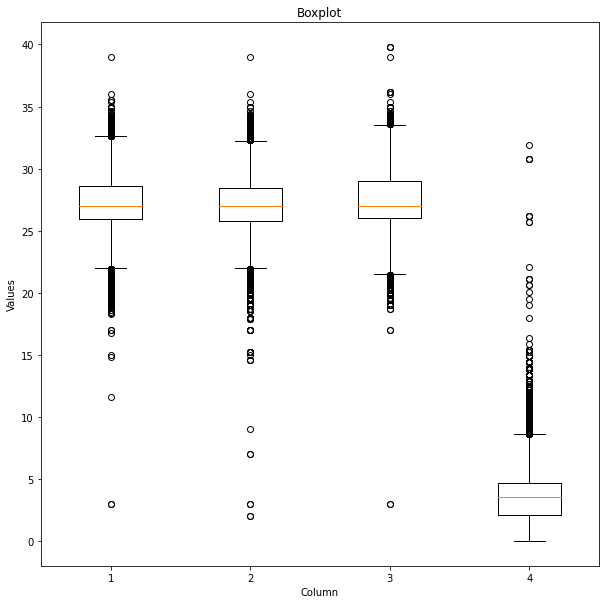

In [11]:
#Plotting the boxplot
plt.figure(figsize=(10,10))
plt.xlabel('Column')
plt.ylabel('Values')
plt.title("Boxplot")
plt.boxplot(data_selected.iloc[:,[1,2,3,6]])

{'whiskers': [<matplotlib.lines.Line2D at 0x20442380400>,
 'caps': [<matplotlib.lines.Line2D at 0x204423809a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20442380130>],
 'medians': [<matplotlib.lines.Line2D at 0x20442380f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x20442381210>],
 'means': []}

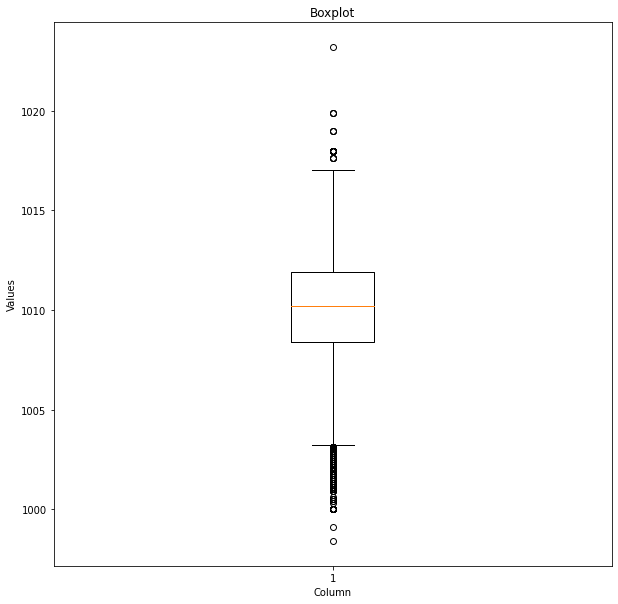

In [12]:
#Plotting the boxplot
plt.figure(figsize=(10,10))
plt.xlabel('Column')
plt.ylabel('Values')
plt.title("Boxplot")
plt.boxplot(data_selected.iloc[:,[4]])

{'whiskers': [<matplotlib.lines.Line2D at 0x204423cdc60>,
 'caps': [<matplotlib.lines.Line2D at 0x204423ce200>,
 'boxes': [<matplotlib.lines.Line2D at 0x204423cd990>],
 'medians': [<matplotlib.lines.Line2D at 0x204423ce7a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204423cea70>],
 'means': []}

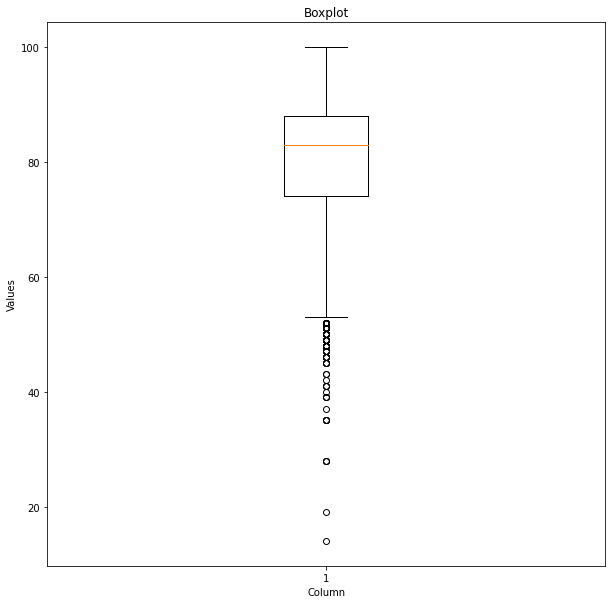

In [13]:
#Plotting the boxplot
plt.figure(figsize=(10,10))
plt.xlabel('Column')
plt.ylabel('Values')
plt.title("Boxplot")
plt.boxplot(data_selected.iloc[:,[5]])

From there, we will handle the outliers by replacing them with the upper and lower boundaries determined by the Boxplot method. The Boxplot method uses statistical measures such as the interquartile range (IQR) to identify the range within which most of the data points lie. Any data points falling outside this range are considered outliers.

In [14]:
#using for loop to replace the outliers
for kolom in data_selected.iloc[:,1:6].columns:
    lower = data_selected[kolom].quantile(0.25) - 1.5 * (data_selected[kolom].quantile(0.75) - data_selected[kolom].quantile(0.25))
    upper = data_selected[kolom].quantile(0.75) + 1.5 * (data_selected[kolom].quantile(0.75) - data_selected[kolom].quantile(0.25))
    data_selected.loc[data_selected[kolom] < lower, kolom] = lower
    data_selected.loc[data_selected[kolom] > upper, kolom] = upper

After This recheck the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2044241f850>,
 'caps': [<matplotlib.lines.Line2D at 0x2044241fdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2044241f580>],
 'medians': [<matplotlib.lines.Line2D at 0x2044244c3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2044244c6a0>],
 'means': []}

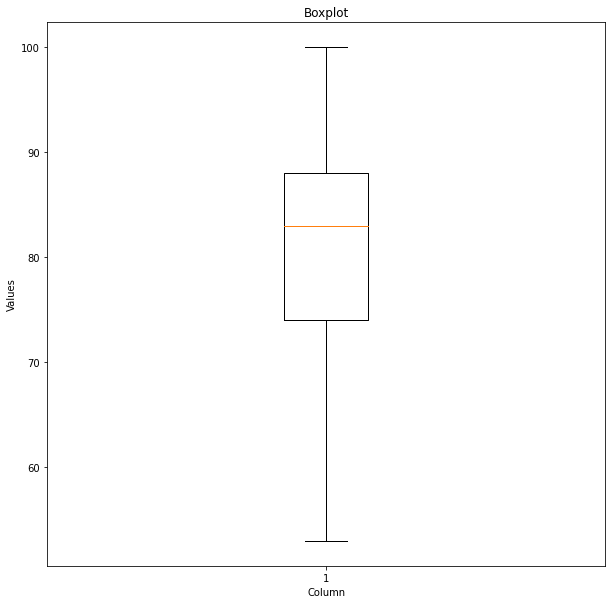

In [15]:
#Plotting the boxplot
plt.figure(figsize=(10,10))
plt.xlabel('Column')
plt.ylabel('Values')
plt.title("Boxplot")
plt.boxplot(data_selected.iloc[:,[5]])

# Exploratory Data Analysis (EDA)

Next, we aim to further explore the data through visualization techniques. Visualization plays a crucial role in gaining insights and understanding patterns within the dataset. By employing various visualizations such as plots, charts, and graphs, we can effectively communicate and interpret the information contained in the data. Visualizations offer a comprehensive view of the variables, relationships, trends, and distributions present in the dataset, enabling us to identify patterns, outliers, correlations, and other relevant insights. This visual exploration will provide us with a clearer understanding of the data and aid in making informed decisions during the analysis process.

C:\Users\aryab\AppData\Local\Temp\ipykernel_628\2871109257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Year'] = data_selected['dt_iso'].astype(str)
C:\Users\aryab\AppData\Local\Temp\ipykernel_628\2871109257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Year']  = data_selected['Year'] .str.slice(0, 4)


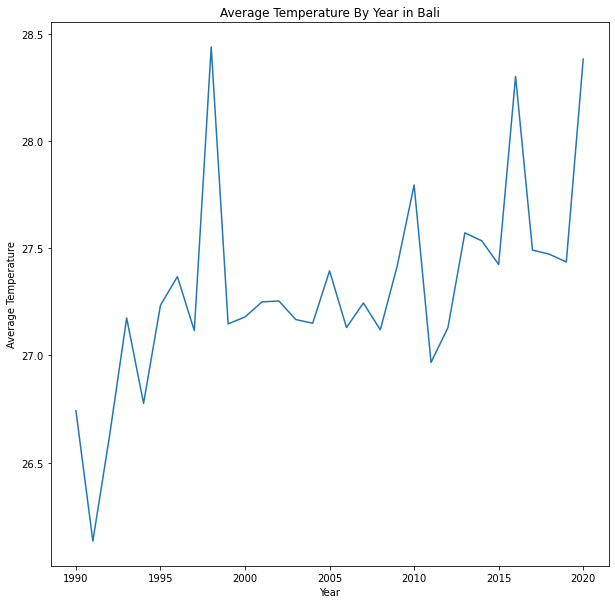

In [16]:
#Change Data type and group by specific year
data_selected['Year'] = data_selected['dt_iso'].astype(str)
data_selected['Year']  = data_selected['Year'] .str.slice(0, 4)
data_per_tahun = data_selected.groupby(['Year'])['temp'].mean()

#Plotting the data
plt.figure(figsize=(10,10))
data_per_tahun.plot()
plt.xlabel('Year')
plt.title("Average Temperature By Year in Bali")
plt.ylabel('Average Temperature')
plt.show()

Based on the above graph, it is observed that the temperature increases over time and reaches its peak at around 28 to 28.5 degrees Celsius. This could be attributed to global warming and the increased activity in Bali during that period. The rising temperature trend indicates a potential impact of global warming on the local climate. The higher temperature levels may be influenced by various factors such as increased greenhouse gas emissions, urbanization, and human activities. It is important to monitor and address these changes to mitigate the potential impacts on the environment and human well-being.

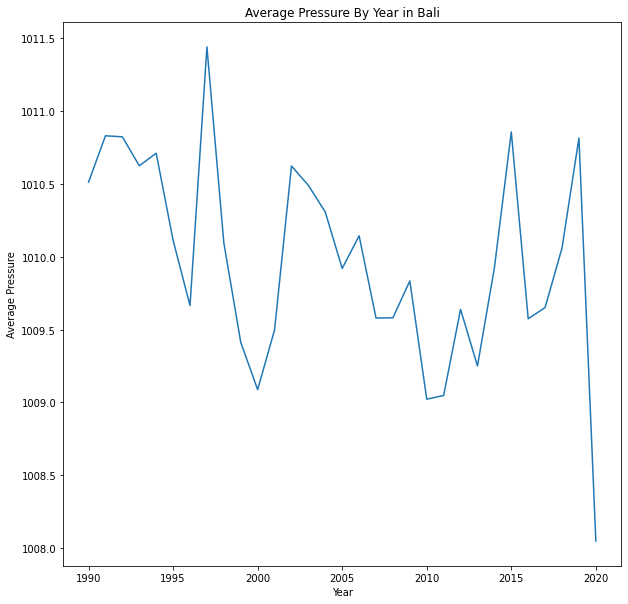

In [17]:
data_per_tahun = data_selected.groupby(['Year'])['pressure'].mean()
#Plotting the data
plt.figure(figsize=(10,10))
data_per_tahun.plot()
plt.xlabel('Year')
plt.title("Average Pressure By Year in Bali")
plt.ylabel('Average Pressure')
plt.show()

The above graph reveals a significant decrease in air pressure in Bali. This phenomenon could be attributed to various factors, including a decrease in ground elevation or influences from other variables such as temperature and humidity. A lower air pressure reading may indicate changes in atmospheric conditions and can be linked to alterations in weather patterns. It is important to further investigate the potential causes and impacts of this observed decrease in air pressure to better understand its implications for the local climate and environment.

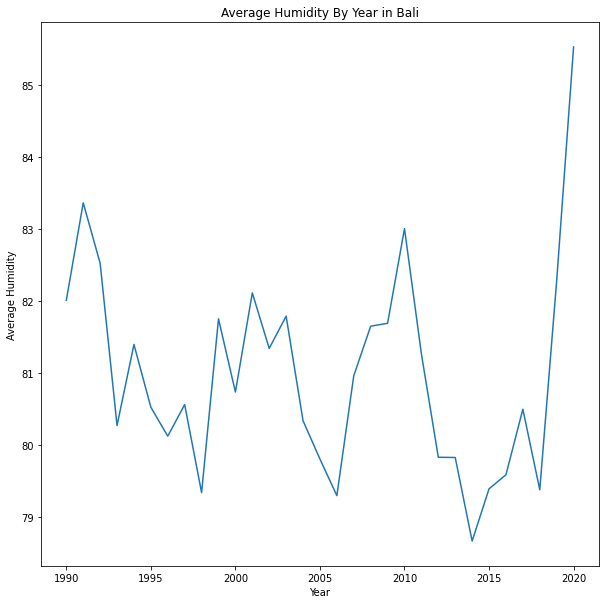

In [18]:
data_per_tahun = data_selected.groupby(['Year'])['humidity'].mean()

#Plotting the data
plt.figure(figsize=(10,10))
data_per_tahun.plot()
plt.xlabel('Year')
plt.title("Average Humidity By Year in Bali")
plt.ylabel('Average Humidity')
plt.show()

The above graph reveals a significant increase in humidity in Bali. This rise can be attributed to various factors, including temperature, air pressure, wind patterns, quantity and quality of sunlight, and vegetation. These factors interact in complex ways and contribute to the overall moisture content in the atmosphere. An increase in humidity can have implications for various aspects of the environment, such as plant growth, water availability, and weather patterns.

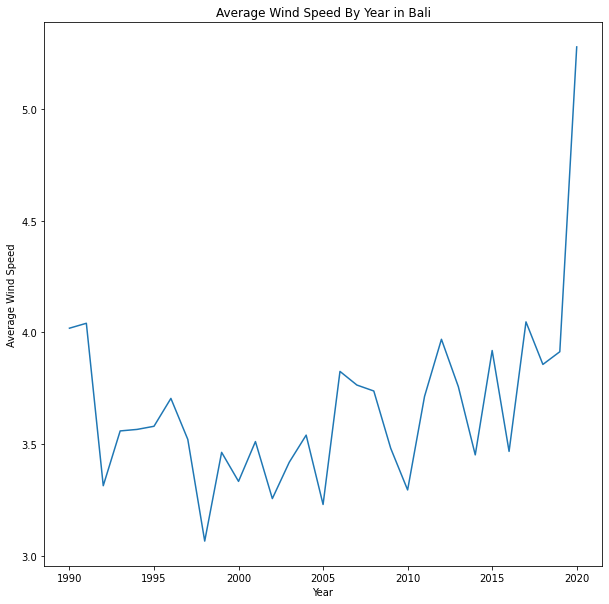

In [19]:
data_per_tahun = data_selected.groupby(['Year'])['wind_speed'].mean()

#Plotting the data
plt.figure(figsize=(10,10))
data_per_tahun.plot()
plt.xlabel('Year')
plt.title("Average Wind Speed By Year in Bali")
plt.ylabel('Average Wind Speed')
plt.show()

The above graph reveals a significant increase in wind speed in Bali. This rise can be attributed to various factors, such as atmospheric pressure differentials, local topography, and regional weather patterns. Wind speed is influenced by the movement of air masses, which can be driven by temperature variations and pressure gradients. The observed increase in wind speed indicates a change in the prevailing wind patterns and can have implications for various sectors, including agriculture, transportation, and energy production.

array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'temp_min'}>],
       [<AxesSubplot:title={'center':'temp_max'}>,
        <AxesSubplot:title={'center':'pressure'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'wind_speed'}>]], dtype=object)

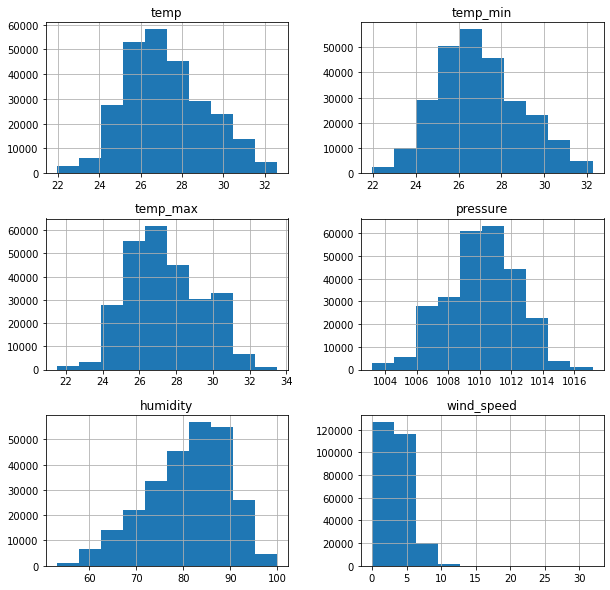

In [20]:
#Plotting the data
data_selected.iloc[:,1:8].hist(figsize=(10,10))

The above graph indicates that the distribution of the data tends to follow a normal distribution, except for the wind speed variable. The majority of the variables exhibit a relatively symmetrical distribution with a peak around the mean value, suggesting a balanced distribution of data points. However, the wind speed variable displays a skewed distribution, indicating that the data is not evenly spread around the mean.

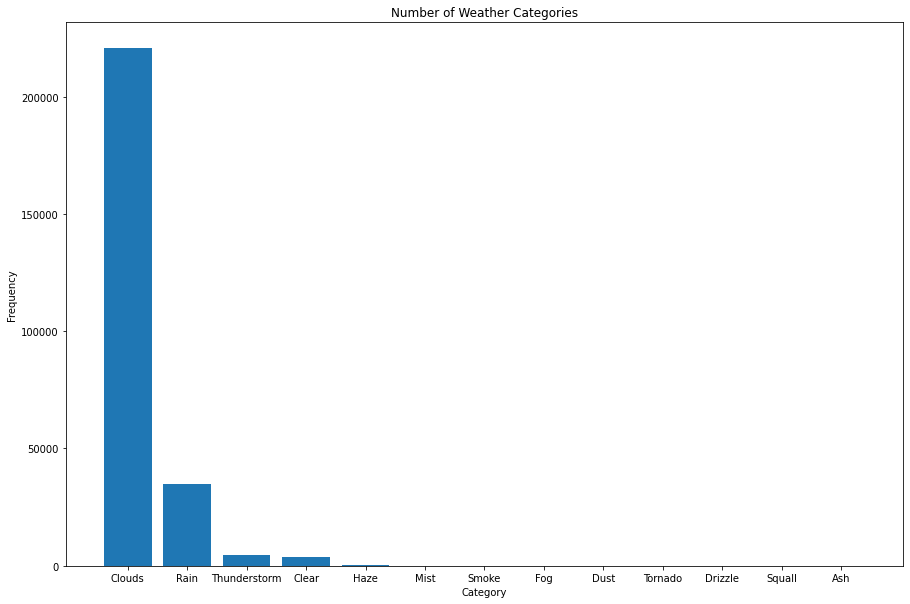

In [21]:
#Plotting the data
kategori_counts = data_selected['weather_main'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(kategori_counts.index, kategori_counts.values)

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title("Number of Weather Categories")

plt.show()

The above graph reveals that there are numerous categories present in our dataset. To simplify the analysis, it is necessary to perform data normalization by reducing the number of categories to just two.

By condensing the categories into two groups, we can simplify the analysis process and focus on the key factors that differentiate the data. This reduction can help in comparing and contrasting the two major categories, identifying patterns, and gaining insights into the underlying trends.

# Data Preporcessing

Next, we would like to perform additional data processing tasks on our dataset. These tasks include conducting correlation analysis and applying one-hot encoding.By performing correlation analysis, Rebalancing Data and applying one-hot encoding, we aim to enhance our understanding of the relationships between variables and ensure that our dataset is appropriately prepared for subsequent analysis and modeling tasks.

In [22]:
#Make the encode
encode = {'Clouds': 0, 'Clear': 0,'Haze':0,'Mist':0,'Smoke': 0, 'Fog': 0,'Dust':0,'Ash':0,'Rain': 1, 'Thunderstorm': 1,'Tornado':1,'Drizzle':1,'Squall': 1}
data_selected['weather_main'].replace(encode, inplace=True)

C:\Users\aryab\AppData\Local\Temp\ipykernel_628\1634840765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['weather_main'].replace(encode, inplace=True)


After that we can check the data

In [23]:
#Counting Values
data_selected['weather_main'].value_counts()

0    225279
1     39645
Name: weather_main, dtype: int64

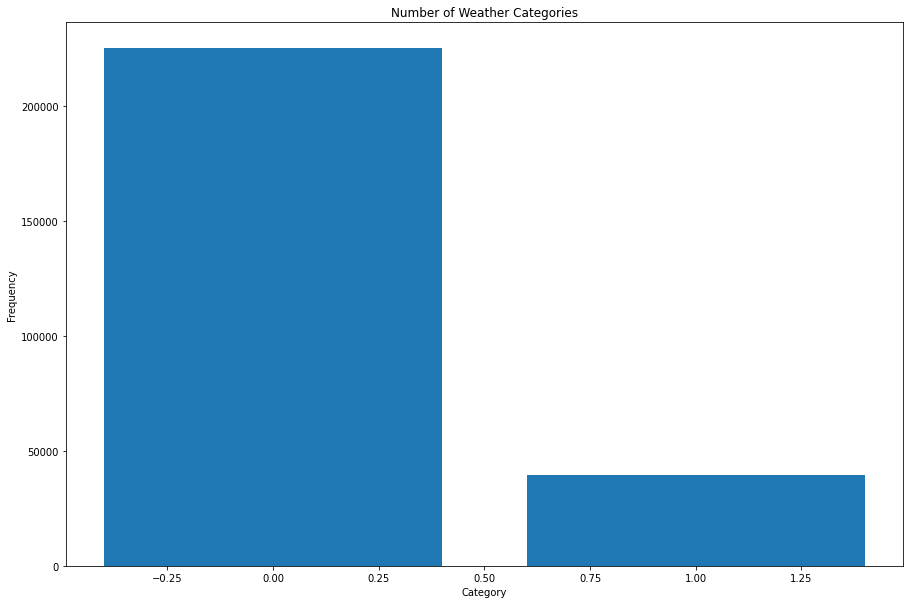

In [24]:
#Plotting Data
kategori_counts = data_selected['weather_main'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(kategori_counts.index, kategori_counts.values)

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title("Number of Weather Categories")

plt.show()

Upon observation, it is evident that the dataset is imbalanced, meaning that the distribution of classes or categories is uneven. To address this issue, we need to perform some dataset rebalancing techniques.To rebalance the dataset, we will apply appropriate rebalancing techniques depending on the specific characteristics of our data and the desired outcome. By achieving a more balanced dataset, we can improve the performance and fairness of our models when dealing with imbalanced class distributions. On these case we will do oversampling method, but before that, we are going to see the correlation between the predictors to target

Text(0.5, 1.0, 'Data Correlation')

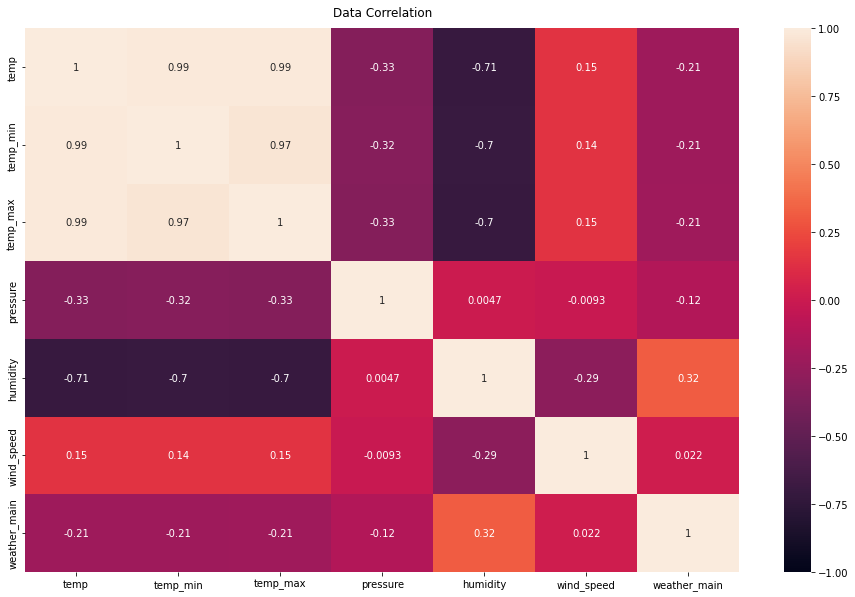

In [25]:
#Plotting Data
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(data_selected.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Data Correlation', fontdict={'fontsize':12}, pad=12)

Based on the correlation chart above, it is evident that temperature, minimum temperature, and maximum temperature exhibit a high degree of correlation. This raises concerns about the possibility of multicollinearity. To address this issue, we have decided to remove the variables of minimum temperature and maximum temperature from the analysis. Additionally, we will also exclude the wind speed variable as it shows very low correlation with the target variable.

In [26]:
#Select the data
data_fix = data_selected[['temp','pressure','humidity','weather_main']]

In [27]:
data_fix.head(10)

,temp,pressure,humidity,weather_main
0,25.82,1010.0,86,1
1,26.20,1011.0,84,1
2,26.45,1011.0,84,1
3,26.80,1011.0,82,1
4,27.04,1010.0,82,0
5,27.23,1009.0,82,0
6,27.32,1008.0,82,0
7,27.29,1008.0,82,1
8,27.34,1007.0,81,1
9,27.23,1007.0,82,0


After that, we will perform data splitting to split the dataset into X and Y

In [28]:
#Split data into X and Y
X = data_fix.drop('weather_main',axis=1).copy()
y = data_fix['weather_main'].copy()

Recheck the data

In [29]:
X.head(10)

,temp,pressure,humidity
0,25.82,1010.0,86
1,26.20,1011.0,84
2,26.45,1011.0,84
3,26.80,1011.0,82
4,27.04,1010.0,82
5,27.23,1009.0,82
6,27.32,1008.0,82
7,27.29,1008.0,82
8,27.34,1007.0,81
9,27.23,1007.0,82


In [30]:
y.head(10)

0    1
1    1
2    1
3    1
4    0
5    0
6    0
7    1
8    1
9    0
Name: weather_main, dtype: int64

Next we will try to do some rescaling dataset

In [31]:
#Scale data
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

In [32]:
X_rescaled

array([[-0.74626484, -0.01551165,  0.59163474],
       [-0.55129126,  0.42361448,  0.36195185],
       [-0.42301917,  0.42361448,  0.36195185],
       ...,
       [ 0.3722678 , -1.33289003,  0.24711041],
       [ 0.3722678 , -1.33289003,  0.24711041],
       [ 0.3722678 , -0.8937639 ,  0.24711041]])

After that we will perform to do some oversampling method

In [33]:
#Oversampling data using SMOTE
try_oversample = SMOTE()

cek = SMOTE(sampling_strategy='minority')
X_rebalance, y_rebalance = cek.fit_resample(X_rescaled,y)
Counter(y_rebalance)

Counter({1: 225279, 0: 225279})

(array([225279.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 225279.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

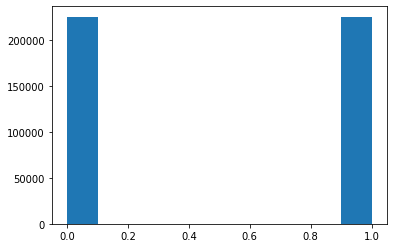

In [34]:
plt.hist(y_rebalance)

Based on the analysis, it appears that the data is already balanced. The next step is to split the data into training and testing sets. We will allocate 80% of the data for training and the remaining 20% for testing.

In [35]:
#Split data into train and testing
X_train, X_test, y_train, y_test = train_test_split(X_rebalance, y_rebalance, test_size=0.2, random_state=0)

In [36]:
X_train.shape

(360446, 3)

In [37]:
y_train.shape

(360446,)

In [38]:
y_train.shape

(360446,)

In [39]:
y_test.shape

(90112,)

Next, due to the large size of the dataset, it takes a significant amount of time to train the models. Therefore, we can apply PCA (Principal Component Analysis) to reduce the training time of the models. Once the dataset is transformed using PCA, we can train our models on the reduced feature space, which typically requires less computational resources and time compared to training on the original high-dimensional data.

In summary, by applying PCA, we can effectively reduce the dimensionality of the dataset and subsequently decrease the training time required for the models, allowing us to expedite the model development process and improve efficiency in handling large datasets.

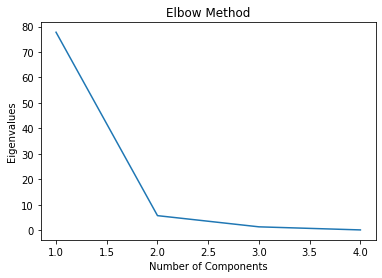

In [40]:
# Iniciate PCA
pca = PCA()

# Fit data to PCA
pca.fit(data_fix)

# Count eigenvalues
eigenvalues = pca.explained_variance_

# Plot Elbow Method
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.title('Elbow Method')
plt.show()

After that we will make the pipeline using PCA =2

# Model Building

In [41]:
# Random Forest
rf_model = RandomForestClassifier()

In [42]:
#Support Vector Classifier
model_naive = GaussianNB()

Next we will train the model based on our dataset

# Model Training

First we will make a pipeline

In [43]:
#Defince PCA
pca2=PCA(n_components=2)

In [44]:
#Make First Pipeline
pipeline = Pipeline([('pca', pca2), ('rf', rf_model)])

In [45]:
#Make Second Pipeline
pipeline2 = Pipeline([('pca', pca2), ('svc', model_naive)])

Next we will train our models

In [46]:
#Fit Pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)), ('rf', RandomForestClassifier())])

In [47]:
#Fit Pipeline
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)), ('svc', GaussianNB())])

# Model Evaluation

Next we will evaluate Random Forest and naive baiyes model

In [53]:
# Random Forest
y_pred_rf = pipeline.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_rf)

# Naive Bayes
y_pred_nb = pipeline2.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_score_nb = f1_score(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
auc_nb = roc_auc_score(y_test, y_pred_nb)

Random forest

In [56]:
print('Accuracy : ',accuracy_rf)
print('Precision : ',precision_rf)
print('F1 score : ',recall_rf)
print('Recall : ',f1_score_rf)

Accuracy :  0.8312544389204546
Precision :  0.837016449746927
F1 score :  0.8225197619682032
Recall :  0.8297047887828698


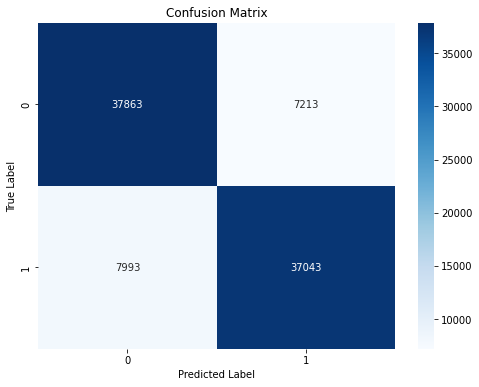

In [59]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [60]:
auc_rf

0.8312505633871542

Naive Bayes

In [61]:
print('Accuracy : ',accuracy_nb)
print('Precision : ',precision_nb)
print('F1 score : ',recall_nb)
print('Recall : ',f1_score_nb)

Accuracy :  0.7094282670454546
Precision :  0.6738152314217223
F1 score :  0.8113731237232437
Recall :  0.7362238833034473


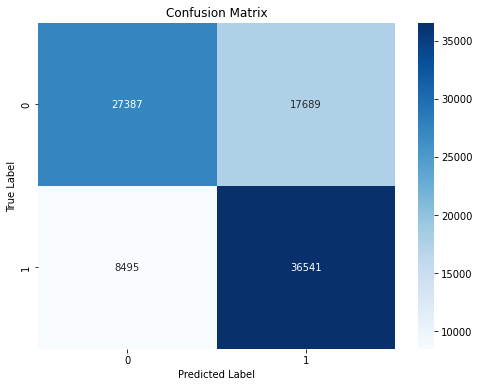

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [64]:
auc_nb

0.7094734994780919

From the two models, it can be observed that the Random Forest model performs better with an accuracy of 83% compared to the Naive Bayes model, which achieves an accuracy of only 71%. The Random Forest model also exhibits a significantly higher AUC score, indicating better overall performance in classification.

Based on these results, the focus will be on improving the Random Forest model to further enhance its accuracy. Various techniques can be employed for this purpose, such as adjusting hyperparameters, optimizing feature selection, or applying ensemble methods. By fine-tuning the Random Forest model, it is anticipated that the accuracy can be further increased, leading to more reliable predictions. For this case, we will use RandomizedSearchCV Method/Hyperparameter tunning

# Model Improvement

We will perform two hyperpramater to decrease the computation time

In [75]:
#Setting up parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt','log2']
}

In [80]:
#Fitting to find the best parameters
grid_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=4, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'n_estimators': 100, 'max_features': 'log2'}


In [81]:
model_rf_grid = RandomForestClassifier(n_estimators= 100, max_features = 'log2')

Then we will make a pipeline for our new model

In [82]:
pipeline3 = Pipeline([('pca', pca2), ('rf', model_rf_grid)])

In [83]:
#Fit Pipeline
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('rf', RandomForestClassifier(max_features='log2'))])

# Model Evaluation (After Improvement)

We will try to evaluate our new models

In [84]:
y_pred_rf_rand = pipeline3.predict(X_test)
accuracy_rf_rand = accuracy_score(y_test, y_pred_rf_rand)
precision_rf_rand = precision_score(y_test, y_pred_rf_rand)
recall_rf_rand = recall_score(y_test, y_pred_rf_rand)
f1_score_rf_rand = f1_score(y_test, y_pred_rf_rand)
confusion_matrix_rf_rand = confusion_matrix(y_test, y_pred_rf_rand)
fpr_rf_rand, tpr_rf_rand, thresholds_rf_rand = roc_curve(y_test, y_pred_rf_rand)
auc_rf_rand = roc_auc_score(y_test, y_pred_rf_rand)

In [85]:
print('Accuracy : ',accuracy_rf_rand)
print('Precision : ',precision_rf_rand)
print('F1 score : ',recall_rf_rand)
print('Recall : ',f1_score_rf_rand)

Accuracy :  0.8313543146306818
Precision :  0.8369734613212874
F1 score :  0.8228306243893774
Recall :  0.8298417888054104


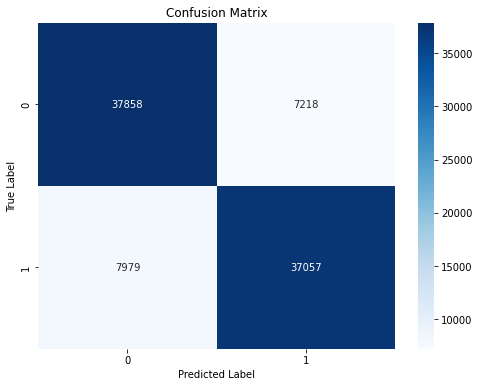

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_rf_rand, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
auc_rf_rand

0.8313505327111497

Although the increase in accuracy is relatively small, we were able to improve the accuracy. The small improvement could be because we dont find the best parameters enough. In the future, we can try more complex parameter configurations to further improve the accuracy.

# Model Interference

Next, We will try the best model we have

In [88]:
masukan = X.sample()
masukan

,temp,pressure,humidity
262338,25.08,1015.0,88


In [89]:
cek_random =pipeline3.predict(masukan.values)
cek_random

array([0], dtype=int64)

# Conclusion

Based on the modeling results, the best-performing model is the Random Forest classifier. After conducting hyperparameter tuning, the model's accuracy has improved. It is expected that this model can contribute to the economic and tourism sectors in Bali in the future. By leveraging the accurate weather predictions provided by the model, businesses and tourists can make informed decisions, leading to better planning and overall growth in the region.